# Natural Language Processing : Sentiment Analysis with Python

------------------------------------
#### Authors :
- Mohamed NIANG
- Yao GNONSOU
- Hoang Dung NGUYEN
-----------------------------------

## I. Introduction

Dans ce projet, nous fessons face à un probleme de classification supervisé sur des commentaires recoltés sur amazon. <br>Le but ici est de traiter puis d'implémenter différent modeles afin d'en déterminer le meilleur pour faire de la prédiction sur de nouveaux commentaires.

les principaux modèles utilisés dans ce TP sont : 

- **Naïve Bayes Classifier**
- **Support Vector Machine Classification**
- **K-Nearest Neighbor Classification**
- **Artificial Neural Networks**


Pour la suite, on effectuera notre analyse suivant le plan ci dessous :

![plan](https://user-images.githubusercontent.com/45575893/79023555-e36fb280-7b80-11ea-9e7f-060aee10b0e5.png)

In [1]:
!pip install jyquickhelper
!pip install langdetect
!pip install scikit-plot

     |████████████████████████████████| 1.1MB 2.9MB/s eta 0:00:01
     |████████████████████████████████| 1.0MB 2.9MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.7-cp36-none-any.whl size=993460 sha256=d5d2bb58c7c76ddfc293134f4846681190f533730e0288a52e4ce009c343c123
  Stored in directory: /root/.cache/pip/wheels/ec/0c/a9/1647275e7ef5014e7b83ff30105180e332867d65e7617ddafe
Successfully built langdetect


In [2]:
### Ignore warning
import warnings
warnings.filterwarnings("ignore")

### Print table of content
from jyquickhelper import add_notebook_menu
add_notebook_menu()

## II. Importation des données

In [3]:
### Packages de base
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().magic('matplotlib inline')
import time
from itertools import chain 
from multiprocessing import Pool
import gc
import sys
from scipy import sparse
from random import sample 

### Packages pour NLP
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
import nltk 
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
stop = set(stopwords.words('english'))
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
stemmer = SnowballStemmer('english')
import nltk.tokenize as tokenize
import gensim
from wordcloud import WordCloud
from langdetect import detect

### Packages pour les plots
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
nltk.download('vader_lexicon')
sia = SIA()

### Packages ML
from umap import UMAP
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.externals import joblib
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam
from sklearn.preprocessing import Normalizer
import scikitplot as skplt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Using TensorFlow backend.


In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
import os
os.chdir("/content/drive/My Drive")
! ls 

'Colab Notebooks'
'Cours_CNN (1).pdf'
 Cours_CNN.pdf
'cours_outils (1).pdf'
 cours_outils.pdf
'Curriculum vitae Mohamed NIANG ENG.pdf'
'Deep Learning (1).pdf'
'Deep Learning.pdf'
'Deep Learning.rar'
'Generative Network.pdf'
 lab4_project.pdf
 Note_descente_gradient.pdf
'Projet Final Intro Machine Learning.rar'
'Reccurent Network.pdf'
'SAPORTA probabilites-analyse-de-donnees-et-statistiques.pdf'
 segmentation.pdf
 test.zip
 train.zip


In [ ]:
df_train = pd.read_csv('train.txt', sep="\t",header =None)
df_train = pd.DataFrame(df_train[0].apply(lambda x: x.split(None, 1)).tolist(), columns=['label', 'text'])

In [8]:
print('Shape of data :',df_train.shape)

Shape of data : (3600000, 2)


Notre analyse portera sur exactement 3.600.000 commentaires correspondant aux observations dans la base d'apprentisage et de 2 colones texte & label.

### II.1 Description des données

In [9]:
df_train.describe(include='all')

,label,text
count,3600000,3600000
unique,2,3600000
top,__label__2,It hurts to shave with this razor: I bought Gi...
freq,1800000,1


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600000 entries, 0 to 3599999
Data columns (total 2 columns):
label    object
text     object
dtypes: object(2)
memory usage: 54.9+ MB


In [11]:
df_train.head(20)

,label,text
0,__label__2,Stuning even for the non-gamer: This sound tra...
1,__label__2,The best soundtrack ever to anything.: I'm rea...
2,__label__2,Amazing!: This soundtrack is my favorite music...
3,__label__2,Excellent Soundtrack: I truly like this soundt...
4,__label__2,"Remember, Pull Your Jaw Off The Floor After He..."
5,__label__2,an absolute masterpiece: I am quite sure any o...
6,__label__1,"Buyer beware: This is a self-published book, a..."
7,__label__2,Glorious story: I loved Whisper of the wicked ...
8,__label__2,A FIVE STAR BOOK: I just finished reading Whis...
9,__label__2,Whispers of the Wicked Saints: This was a easy...


In [ ]:
df_train = df_train.drop_duplicates()

In [13]:
df_train['label'].unique()

array(['__label__2', '__label__1'], dtype=object)

Il y a donc 2 classes à prévoir <br>
On obseve maintenant quelques pharses de manière complète

In [14]:
print(df_train['label'][0])
df_train['text'][0]

__label__2


'Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^'

In [15]:
print(df_train['label'][1])
df_train['text'][1]

__label__2


"The best soundtrack ever to anything.: I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny."

In [16]:
print(df_train['label'][6])
df_train['text'][6]

__label__1


'Buyer beware: This is a self-published book, and if you want to know why--read a few paragraphs! Those 5 star reviews must have been written by Ms. Haddon\'s family and friends--or perhaps, by herself! I can\'t imagine anyone reading the whole thing--I spent an evening with the book and a friend and we were in hysterics reading bits and pieces of it to one another. It is most definitely bad enough to be entered into some kind of a "worst book" contest. I can\'t believe Amazon even sells this kind of thing. Maybe I can offer them my 8th grade term paper on "To Kill a Mockingbird"--a book I am quite sure Ms. Haddon never heard of. Anyway, unless you are in a mood to send a book to someone as a joke---stay far, far away from this one!'

In [17]:
print(df_train['label'][14])
df_train['text'][14]

__label__1


'Awful beyond belief!: I feel I have to write to keep others from wasting their money. This book seems to have been written by a 7th grader with poor grammatical skills for her age! As another reviewer points out, there is a misspelling on the cover, and I believe there is at least one per chapter. For example, it was mentioned twice that she had a "lean" on her house. I was so distracted by the poor writing and weak plot, that I decided to read with a pencil in hand to mark all of the horrible grammar and spelling. Please don\'t waste your money. I too, believe that the good reviews must have been written by the author\'s relatives. I will not put much faith in the reviews from now on!'

##### <u>Remarque 1</u>:

Les textes étudiés sont  appriorie redigés en anglais. En outre, ils comportent pas mal de ponctuations et quelsues emoji.<br>
On peut apriori apres lecture dire que le label 1  correspond aux commentaires plutot négatifs alors que ceux du label 2 sont positif. 

##### Rename label

In [ ]:
### Rename label
df_train['label_new'] = 'good'
df_train['label_new'][df_train['label']=='__label__1']='bad'
df_train.drop('label',axis = 1,inplace=True)

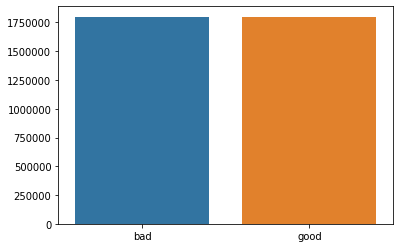

In [19]:
sns.barplot(np.unique(df_train['label_new']),df_train.groupby('label_new').count().values[:,0])

La figure ci-dessus donne un appercu de la distribution de nos labels dans le data train.<br> ( Distrubution équilibrée ) 
### II.2 Création de nouvelles variables
Une fois cette premiere visualisation réalisé, on se demande maintenant si la création de nouvelles variables par simple transformation de nos données peut nous apporter des informations suplémentaires. C'est pour quoi, on s'intéresse maintenant à la distribution de la taille des textes par rapport aux différents labels. 

In [ ]:
df_train['len'] = df_train['text'].apply(lambda x: len(x.split()))

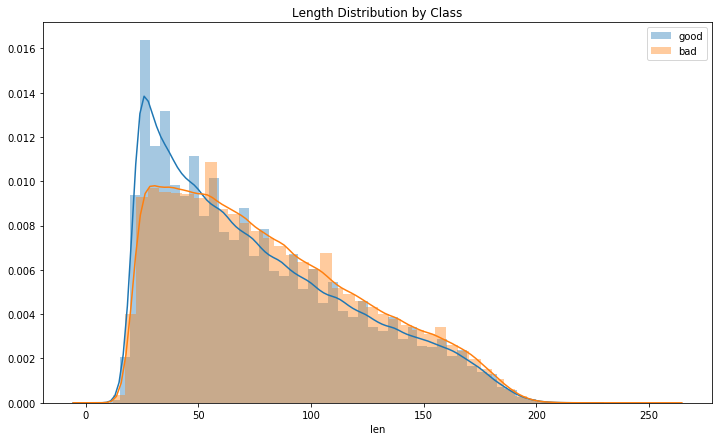

In [21]:
plt.figure(figsize = (12, 7))
sns.distplot(df_train['len'][df_train['label_new'] =='good'], hist = True, label = "good",)
sns.distplot(df_train['len'][df_train['label_new'] =='bad'], hist = True, label = "bad")
plt.legend(fontsize = 10)
plt.title("Length Distribution by Class", fontsize = 12)
plt.show()

On n'observe qu'une légère différence entre les deux distributions. Néamoins, pour la suite on considère que cette différence différence serait suceptible de nous apporter des informations. On decide donc de conserver cette nouvelle variable pour l'élaboration de notre modèle.
##### II.2.A Certaines Poinctuations apportent elles des informations sur la distribution  des labels ?

Text(0.5, 1.0, 'Exclamation_mark (n =1191629)')

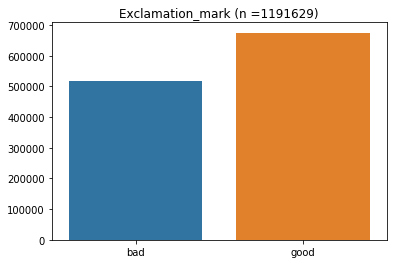

In [22]:
sf_train_exclamation_mark = df_train[df_train['text'].apply(lambda x: '!' in x)]
sns.barplot(np.unique(sf_train_exclamation_mark['label_new']),sf_train_exclamation_mark.groupby('label_new').count().values[:,0])
plt.title('Exclamation_mark (n =' +str(sf_train_exclamation_mark.shape[0])+')')

Text(0.5, 1.0, 'Question_mark (n =390365)')

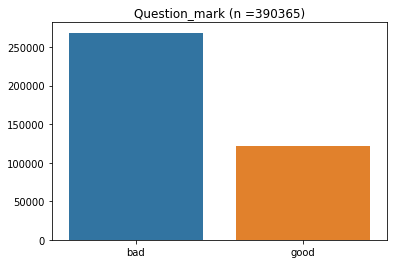

In [23]:
sf_train_question_mark = df_train[df_train['text'].apply(lambda x: '?' in x)]
sns.barplot(np.unique(sf_train_question_mark['label_new']),sf_train_question_mark.groupby('label_new').count().values[:,0])
plt.title('Question_mark (n =' +str(sf_train_question_mark.shape[0])+')')

Text(0.5, 1.0, 'Emotion_unhappy (n =9204)')

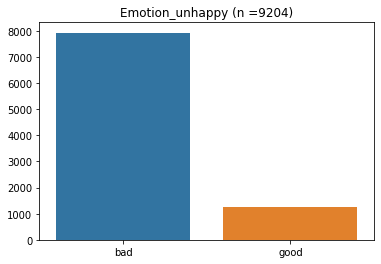

In [24]:
sf_train_emotion_unhappy = df_train[df_train['text'].apply(lambda x: ':(' in x)]
sns.barplot(np.unique(sf_train_emotion_unhappy['label_new']),sf_train_emotion_unhappy.groupby('label_new').count().values[:,0])
plt.title('Emotion_unhappy (n =' +str(sf_train_emotion_unhappy.shape[0])+')')

Text(0.5, 1.0, 'Emotion_happy (n =19839)')

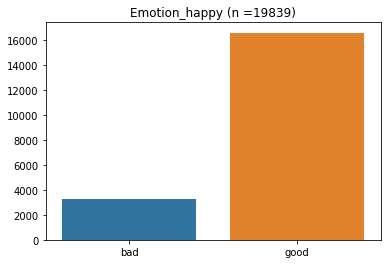

In [25]:
sf_train_emotion_happy = df_train[df_train['text'].apply(lambda x: ':)' in x)]
sns.barplot(np.unique(sf_train_emotion_happy['label_new']),sf_train_emotion_happy.groupby('label_new').count().values[:,0])
plt.title('Emotion_happy (n =' +str(sf_train_emotion_happy.shape[0])+')')

##### <u>Remarque2</u>:

On observe qu'on a beaucoup plus de point d'exclamation dans les commentaires classé positivement et plus de point d'intérogation dans les messages classé négativement.<br> Deplus, il y a une forte corélation entre l'apparution des emojis **happy** et le fait que le texte soit classé positivement et inversement pour **unhappy**. 

#### II.2.B Sentiment Intensity Analysis (SIA)

Dans cette parti une analyserons l'intensité des sentiments des différents commentaires par **VADER** (Valence Aware Dictionary and sEntiment Reasoner). Cette analyse ne sera éffectué que sur 10000 observations par souci de temps de calcul. Notons que la variable "label" dans la table ci-dessous est la prediction de la SIA 

In [26]:
train_sentiment = pd.DataFrame.from_records(df_train['text'][0:10000].apply(lambda x: sia.polarity_scores(x)))
train_sentiment['len'] = df_train['text'][0:10000].apply(len)
train_sentiment['label'] = 'good'
train_sentiment['label'][train_sentiment['neg']>train_sentiment['pos']] ='bad'
train_sentiment['real_label'] = df_train['label_new'][0:10000]
train_sentiment.head()

,neg,neu,pos,compound,len,label,real_label
0,0.088,0.669,0.243,0.9454,426,good,good
1,0.018,0.837,0.145,0.8957,509,good,good
2,0.040,0.692,0.268,0.9858,760,good,good
3,0.090,0.615,0.295,0.9814,743,good,good
4,0.000,0.746,0.254,0.9781,481,good,good


In [27]:
print(classification_report(df_train['label_new'][0:10000], train_sentiment['label']))

              precision    recall  f1-score   support

         bad       0.86      0.51      0.64      5097
        good       0.64      0.91      0.75      4903

    accuracy                           0.71     10000
   macro avg       0.75      0.71      0.70     10000
weighted avg       0.75      0.71      0.69     10000



In [28]:
accuracy_score(df_train['label_new'][0:10000], train_sentiment['label'])

0.7067

L'accuracy trouvé ce dessus n'est pas tres performante. Cependant on conserve la variable car on estime que cette statistique nous apportera des informations dans notre model. 
#### II.2.C Language Detection


In [ ]:
lang_detection = df_train.iloc[0:10000]
lang_detection['lang'] = df_train['text'][0:10000].map(detect,) 

In [30]:
lang_detection[lang_detection['lang'] != 'en']

,text,label_new,len,lang
169,Awesume! BEST BLOCKS EVER!: THIS TOY WAS OUR G...,good,27,de
1249,"Il grande ritorno!: E' dai tempi del tour di ""...",good,153,it
1259,La reencarnación vista por un científico: El p...,good,34,es
1260,Excelente Libro / Amazing book!!: Este libro h...,good,105,es
1261,Magnifico libro: Brian Weiss ha dejado una mag...,good,47,es
1639,El libro mas completo que existe para nosotras...,good,29,es
1745,Excelente!: Una excelente guía para todos aque...,good,49,es
2316,Nightwish is unique and rocks for eva: Moi to ...,good,47,fr
2486,Palabras de aliento para tu caminar con Dios: ...,good,80,es
2760,Completement nul: Fait sur commande et ennuyan...,bad,18,fr


In [31]:
lang_detection['lang'].value_counts()

en    9970
es      16
fr       8
de       4
id       1
it       1
Name: lang, dtype: int64

On vient ici d'identifier plusieurs commentaires qui ne sont pas en anglais et on décide de les retirer de notre jeu de données. Cependant, en terme de proportion cela ne représente que 0,31% des commentaires.<br>
On a décidé pour la suite on décide de ne pas retenir cette variable car la détection de langue demande enormement de temps de calcul pour une proportionalité relativement faible. 

In [32]:
### Clean memory
n_obs = 10000
df_train = df_train.iloc[0:n_obs]
del sf_train_emotion_happy, sf_train_emotion_unhappy, sf_train_question_mark, sf_train_exclamation_mark, lang_detection
gc.collect()

11

##  III. Preprocessing
Pour cette étape, nous faisons les travaux comme suivant : <br>
* Tokenizer les text -- https://www.debuggex.com/cheatsheet/regex/python 
* Enlever les punctuation <br>
* Enlever les stopwords <br>
* Faire une lematisation avec part of speach -- https://www.machinelearningplus.com/nlp/lemmatization-examples-python/

In [ ]:
from textblob import TextBlob
def lemmatize_with_postag(sentence):
    sent = TextBlob(sentence)
    tag_dict = {"J": 'a', 
                "N": 'n', 
                "V": 'v', 
                "R": 'r'}
    words_and_tags = [(w, tag_dict.get(pos[0], 'n')) for w, pos in sent.tags]    
    lemmatized_list = [wd.lemmatize(tag) for wd, tag in words_and_tags]
    return " ".join(lemmatized_list)

### Function which define if a word is a number or not

def is_number(word):
    try: 
        x = float(word)
        return (x == x) and (x - 1 != x)
    except Exception:
        return False
    
### Tokenization using regular expression pattern which keep numbers, ?_mark, !_mark, :), :(     
tokenizer= tokenize.RegexpTokenizer(r'[0-9]*\.?[0-9]+|[a-zA-Z]+|[!]+|[:)]+|[:(]+|[?]+|[^[a-zA-Z]\s]+|[^[a-zA-Z][0-9]]')

### dictionary number to word
number2word = {'0':'zero','1':'one','2':'two','3':'three','4':'four','5':'five','6':'six','7':'seven','8':'eight','9':'nine','.':'point'}

### English Stemming 
stemmer = SnowballStemmer('english')

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    4. Keep ?, keep !
    5. Keep . for decimal numbers
    """
    mess = tokenizer.tokenize(mess.lower())
    
    word_list = []
        
    for word in mess:
        if (word ==':') or (word.startswith(')')) or (word.startswith('(')): 
            next
        elif word.startswith(':)') :
            word_list.append('emotion_happy')
        elif word.startswith(':(') :
            word_list.append('emotion_unhappy')
        elif word.startswith('?') : 
            word_list.append('question_mark')
        elif word.startswith('!') :
            word_list.append('exclamation_mark')
        elif (word not in stopwords.words('english')) and (word not in ':.%...') and (is_number(word)==False):
            word_list.append(lemmatize_with_postag(word))
        elif is_number(word)==True:
            b = [number2word.get(i) for i in list(word)]
            word_list += b
    return word_list



In [34]:
print('Pharse originale : \n')
print(df_train['text'][32],'\n')
print('Pharse transformée: \n')
print(' '.join(text_process(df_train['text'][32])),'\n')
print('Liste de mots (Tokenization): \n')
text_process(df_train['text'][32])

Pharse originale : 

should be titled "Hollywood Debacle": The plot is so ridiculous, I have to wonder if they even read the script before making this film. The mountain lion breaks out of his trailer - and the cars behind don't notice? The mountain lion is captured - and put in a jail cell? Get real! Utterly, completely stupid. 

Pharse transformée: 

title hollywood debacle plot ridiculous wonder even read script make film mountain lion break trailer car behind notice question_mark mountain lion capture put jail cell question_mark get real exclamation_mark utterly completely stupid 

Liste de mots (Tokenization): 



['title',
 'hollywood',
 'debacle',
 'plot',
 'ridiculous',
 'wonder',
 'even',
 'read',
 'script',
 'make',
 'film',
 'mountain',
 'lion',
 'break',
 'trailer',
 'car',
 'behind',
 'notice',
 'question_mark',
 'mountain',
 'lion',
 'capture',
 'put',
 'jail',
 'cell',
 'question_mark',
 'get',
 'real',
 'exclamation_mark',
 'utterly',
 'completely',
 'stupid']

In [35]:
print('Pharse originale : \n')
print(df_train['text'][979],'\n')
print('Pharse transformée: \n')
print(' '.join(text_process(df_train['text'][979])),'\n')
print('Liste de mots (Tokenization): \n')
text_process(df_train['text'][32])

Pharse originale : 

Great desk and a great buy! Thanks Amazon:): We bought this desk for my seven year old daughter to keep her lap top on and to do homework. It was not to disappoint. The desk is perfect size for her to sit and work. Very high quality and easy to put together. I would highly recommend this product to others? 

Pharse transformée: 

great desk great buy exclamation_mark thanks amazon emotion_happy bought desk seven year old daughter keep lap top homework disappoint desk perfect size sit work high quality easy put together would highly recommend product others question_mark 

Liste de mots (Tokenization): 



['title',
 'hollywood',
 'debacle',
 'plot',
 'ridiculous',
 'wonder',
 'even',
 'read',
 'script',
 'make',
 'film',
 'mountain',
 'lion',
 'break',
 'trailer',
 'car',
 'behind',
 'notice',
 'question_mark',
 'mountain',
 'lion',
 'capture',
 'put',
 'jail',
 'cell',
 'question_mark',
 'get',
 'real',
 'exclamation_mark',
 'utterly',
 'completely',
 'stupid']

Pour la suite, nous ferons la modélisation sur seulement 10000 observations. On choisira le meuilleur modèle et l'addapte sur tout le jeu d'apprentisage, puis on sortira le résultat prévu sur la base de test.

In [ ]:
### These functions allow us to work in parallel
num_partitions = 10 #number of partitions to split dataframe
num_cores = 4 #number of cores on your machine

def vec_text_process(array):
    return array.apply(text_process)

def parallelize_dataframe(df):
    df_split = np.array_split(df, num_partitions)
    pool = Pool(num_cores)
    df = pd.Series(list(chain.from_iterable(pool.map(vec_text_process, df_split))))
    pool.close()
    pool.join()
    return df

df_train_tokens = parallelize_dataframe(df_train['text'][0:n_obs])


##  IV. Création de la matrice des features
Nous allons transformer notre texte en matrice numérique pouvant etre implémenté dans différents algorithmes de machine learning pour faire de la classifacation.

Il existe plusieurs méthode de transformation du texte. Le plus simple d'entre eux est le Bag-of-words ou en ligne on aura les différents commentaire et en colone chaque unique mot présent dans le texte analisé.
### IV.1 Train test splitting


In [37]:
train_index = df_train.index.isin(sample(range(int(n_obs)), int(n_obs*0.7)))
X_train = df_train_tokens[train_index]
Y_train = df_train['label_new'][train_index].reset_index(drop=True)

X_test = df_train_tokens[~train_index].reset_index(drop=True)
Y_test = df_train['label_new'][~train_index].reset_index(drop=True)

### Clear memory
#del df_train, df_train_tokens
gc.collect()

0

###  IV.2  Frequence d'apparution des mots 

In [ ]:
### Create a dictionary 
df_train_dict = gensim.corpora.Dictionary(X_train)

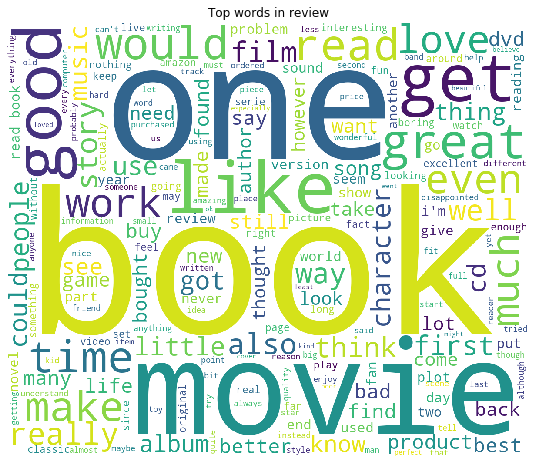

In [39]:
### we draw word cloud on first 10000 reviews 
text = ' '.join(df_train['text'].str.lower().values[0:10000])
wordcloud = WordCloud(max_font_size=None, stopwords=stop, background_color='white',
                      width=1200, height=1000).generate(text)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.title('Top words in review')
plt.axis("off")
plt.show()

In [40]:
### Clear memory
del df_train, df_train_tokens
gc.collect()

1660

In [ ]:
# fonction qui sort la dataframe de la fréquence
def most_frequent_words(dictionary) : 
    df_tokens = pd.DataFrame.from_dict(dictionary.dfs, orient='index',columns=['counts'])
    get_words = np.vectorize(dictionary.get)
    df_tokens['word'] = get_words(df_tokens.index)
    df_tokens.sort_values('counts',ascending=False,inplace = True)
    return df_tokens
df_tokens = most_frequent_words(df_train_dict)

In [49]:
print('The length of dictionary =', df_tokens.shape[0])

The length of dictionary = 20607


In [50]:
df_tokens.reset_index(drop = True, inplace=True)
df_tokens.head()

,counts,word
0,2943,one
1,2331,exclamation_mark
2,2250,book
3,1773,get
4,1709,like


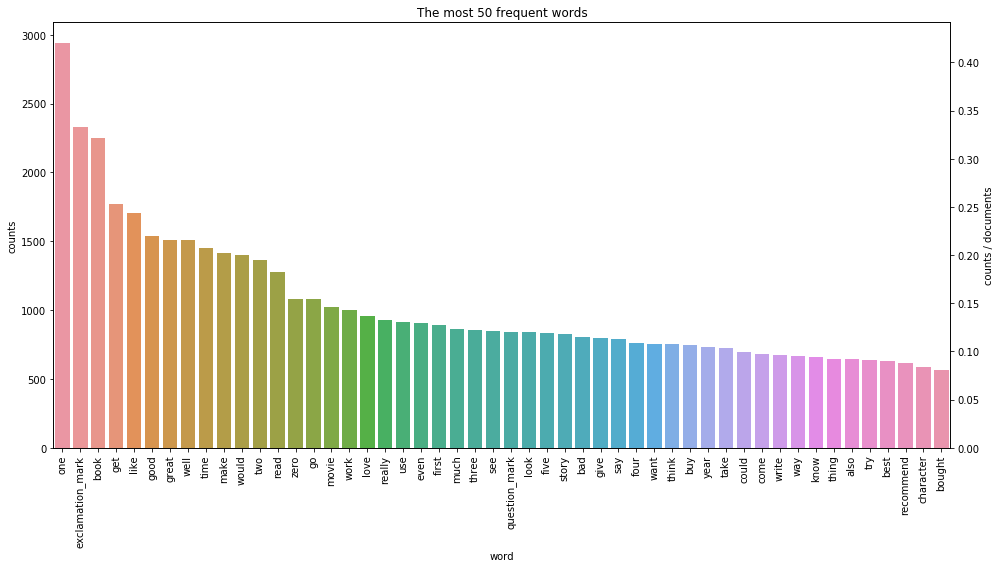

In [51]:
fig, ax1 = plt.subplots(figsize=(14,8))
g = sns.barplot(df_tokens['word'][0:50],y=df_tokens['counts'][0:50], ax=ax1)
plt.xticks(rotation=90,fontsize=10)
plt.title('The most 50 frequent words')

ax2 = ax1.twinx()
ax2.set_ylim(0,ax1.get_ylim()[1]/X_train.shape[0])
ax2.set_ylabel('counts / documents')
fig.tight_layout() 
plt.show()

In [52]:
df_tokens['counts'].describe()

count    20607.000000
mean        11.962974
std         65.602320
min          1.000000
25%          1.000000
50%          1.000000
75%          4.000000
max       2943.000000
Name: counts, dtype: float64

In [53]:
print('Quantile 95% :', np.quantile(df_tokens['counts'], 0.95))
print('Quantile 97.5% :', np.quantile(df_tokens['counts'], 0.975))
print('Number of words appearing only 1 time =', sum(df_tokens['counts'] ==1 ))
print('Number of frequencies of the 10000th word =', df_tokens['counts'][9999])

Quantile 95% : 40.0
Quantile 97.5% : 83.84999999999854
Number of words appearing only 1 time = 10583
Number of frequencies of the 10000th word = 2


En ne prenant en compte que l'intensité d'apparution des mots sur le graphe cidessus, on se rend compte que la représentation n'est pas tres net et difficile à interpréter.<br>
Pour la suite, on va multiplier cette frequence par une variable permettant de définir le poid de chaque mots


In [ ]:
df_train_dict_1 = df_train_dict
df_train_dict_1.filter_extremes(keep_n=1000)
X_train_corpus  = [df_train_dict_1.doc2bow(doc) for doc in X_train]
X_train_visu = gensim.matutils.corpus2dense(X_train_corpus, num_terms=len(df_train_dict_1)).T
a = X_train_visu/ X_train_visu.sum(axis =0)[None,:]

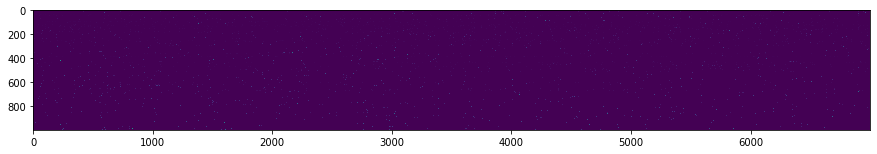

In [55]:
plt.figure(figsize=(15,8))

plt.imshow(a[np.argsort(Y_train),:].T,)

Le gaphique ci-dessus illustre la densité de mots dans la matrice de Bage of Words<br>
Nous decidons de garder 10000 mots les plus présentants dans la dictionnaire <br>

In [ ]:
df_train_dict.filter_extremes(keep_n=10000)

In [ ]:
X_train_corpus  = [df_train_dict.doc2bow(doc) for doc in X_train]
X_train_tfidf = gensim.models.TfidfModel(X_train_corpus, df_train_dict)

### transform data to spare matrix in order to reduce memory
X_train_tfidf_full = gensim.matutils.corpus2csc(X_train_tfidf[X_train_corpus], num_terms=len(df_train_dict)).T

In [ ]:
X_test_corpus  = [df_train_dict.doc2bow(doc) for doc in X_test]
X_test_tfidf = gensim.models.TfidfModel(X_test_corpus, df_train_dict)

### transform data to spare matrix in order to reduce memory
X_test_tfidf_full = gensim.matutils.corpus2csc(X_test_tfidf[X_test_corpus], num_terms=len(df_train_dict)).T

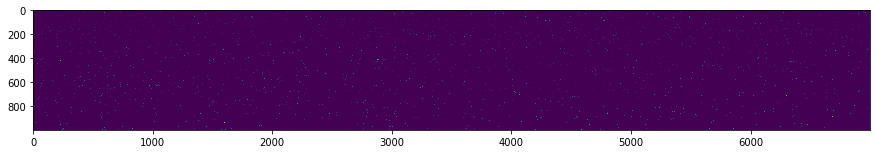

In [59]:
df_train_dict.filter_extremes(keep_n=1000)
X_train_corpus_visu  = [df_train_dict.doc2bow(doc) for doc in X_train]
X_train_tfidf_visu = gensim.models.TfidfModel(X_train_corpus_visu, df_train_dict)
X_train_tfidf_visu = gensim.matutils.corpus2dense(X_train_tfidf_visu[X_train_corpus_visu], num_terms=len(df_train_dict)).T
b = X_train_tfidf_visu/ X_train_tfidf_visu.sum(axis =0)[None,:]
plt.figure(figsize=(15,8))
plt.imshow(b[np.argsort(Y_train),:].T)

Le gaphique ci-dessus illustre le poid des mots dans la matrice de TF-IDF <br>
Pour la suite, on utilisera la matrice TF-IDF parce qu'on considère qu'elle est la version "scaling" du Bag of Words, et est plus addaptée pour la plupart des algorithme de ML

### IV.3 Réduction de dimention<br>

A cette étape, on souhaite réduire la taille de notre matrice. En effet, le bag of words selectione tout les mots uniques dans l'enssemble de commentaires ce qui peut entrainer avec un trop grand nombre de zero car certaint mots n'apparaissent que dans une poigné de commentaires.

Deplus, une matrie de taille pleine peut entrainer des erreurs dans notre algorhytme c'est pour quoi
il a été normale de se questioner sur la viabilité de conserver ces mots dans notre matrice

Pour effectuer cette réduction, nous testerons différentes méthodes qui se prete bien au traitement de texte. <br>

Les quelques methodes implémenté sont : 

1. Principal component analysis (PCA)
2. Random projection (RP)
3. Latent Dirichet Allocation (LDA) http://cs229.stanford.edu/proj2017/final-reports/5163902.pdf
4. Uniform Manifold Approximation and Projection (UMAP)

#### IV.3.1 PCA

In [ ]:
### For PCA, we try first with 200 components
p = time.time()
pca = PCA(n_components = 200)
X_train_tfidf_pca = pca.fit_transform(X_train_tfidf_full.A)


In [61]:
pca_analysis = pd.DataFrame(columns = ['Number of components','Cumulative of variance ratio'])
pca_analysis['Number of components'] = np.arange(1,201)
pca_analysis['Cumulative of variance ratio'] = np.cumsum(pca.explained_variance_ratio_)
pca_analysis

,Number of components,Cumulative of variance ratio
0,1,0.011826
1,2,0.022762
2,3,0.030978
3,4,0.038474
4,5,0.045275
...,...,...
195,196,0.442414
196,197,0.443662
197,198,0.444906
198,199,0.446142


Dans notre ACP on fait le choix  de 200  composante principale qui ne contribue que de 20% de la totalité de nos variable. à premiere vue, ce n'est pas très significatif mais pour des soucis de temps de calcul on accepte et regardera plus tard si on doit en récupérer plus.

In [ ]:
X_test_tfidf_pca = pca.transform(X_test_tfidf_full.A)
time_pca=time.time() - p

#### IV.3.2 LDA

In [ ]:
p = time.time()
lda_model_tfidf = gensim.models.LdaMulticore(X_train_tfidf[X_train_corpus], num_topics= 20, id2word=df_train_dict, passes=2, workers=4)
X_train_lda_topic = lda_model_tfidf[X_train_tfidf[X_train_corpus]]
X_train_tfidf_lda = sparse.lil_matrix((len(X_train_tfidf[X_train_corpus]),20), dtype=np.float64)

for i in range(len(X_train_tfidf[X_train_corpus])):
    for j in X_train_lda_topic[i]:
        X_train_tfidf_lda[i,j[0]] = j[1]

X_test_lda_topic = lda_model_tfidf[X_test_tfidf[X_test_corpus]]
X_test_tfidf_lda = sparse.lil_matrix((len(X_test_tfidf[X_test_corpus]),20), dtype=np.float64)

for i in range(len(X_test_tfidf[X_test_corpus])):
    for j in X_test_lda_topic[i]:
        X_test_tfidf_lda[i,j[0]] = j[1]
        
del lda_model_tfidf, X_train_lda_topic, X_test_lda_topic
time_lda=time.time() - p

#### IV.3.3 RP

In [ ]:
p = time.time()
rp_model_tfidf = gensim.models.RpModel(X_train_tfidf[X_train_corpus], id2word=df_train_dict, num_topics= 100)
X_train_rp_topic = rp_model_tfidf[X_train_tfidf[X_train_corpus]]
X_train_tfidf_rp = sparse.lil_matrix((len(X_train_tfidf[X_train_corpus]),100), dtype=np.float64)

for i in range(len(X_train_tfidf[X_train_corpus])):
    for j in X_train_rp_topic[i]:
        X_train_tfidf_rp[i,j[0]] = j[1]
        

X_test_rp_topic = rp_model_tfidf[X_test_tfidf[X_test_corpus]]
X_test_tfidf_rp = sparse.lil_matrix((len(X_test_tfidf[X_test_corpus]),100), dtype=np.float64)

for i in range(len(X_test_tfidf[X_test_corpus])):
    for j in X_test_rp_topic[i]:
        X_test_tfidf_rp[i,j[0]] = j[1]
        
del rp_model_tfidf, X_train_rp_topic, X_test_rp_topic

time_rp=time.time() - p

#### IV.3.4 UMAP

In [ ]:
### n_components can be set between 1 to 100, but this technique consume a lot of time, so we choose only 20
p = time.time()
umap = UMAP(n_components=20, metric = 'cosine')
X_train_tfidf_umap = umap.fit_transform(X_train_tfidf_full.A)
X_test_tfidf_umap = umap.transform(X_test_tfidf_full.A)
del umap
time_umap = time.time()-p

Par ailleurs, on rattache a cette matrice  l'analyse des sentiment et les variable supplémentaire crée précédemment.

In [ ]:
train_sentiment['len'] = Normalizer().fit_transform(np.array(train_sentiment['len']).reshape(1,-1)).reshape(-1,1)
sentiment = train_sentiment[['neg','neu','pos','compound','len']]
del train_sentiment

X_train_tfidf_full = sparse.hstack((sentiment[0:int(n_obs*0.7)], X_train_tfidf_full))
X_test_tfidf_full = sparse.hstack((sentiment[int(n_obs*0.7):n_obs], X_test_tfidf_full))

X_train_tfidf_pca = np.concatenate([sentiment[0:int(n_obs*0.7)],X_train_tfidf_pca],axis =1)
X_test_tfidf_pca = np.concatenate([sentiment[int(n_obs*0.7):n_obs],X_test_tfidf_pca],axis =1)

X_train_tfidf_lda = sparse.hstack((sentiment[0:int(n_obs*0.7)], X_train_tfidf_lda))
X_test_tfidf_lda = sparse.hstack((sentiment[int(n_obs*0.7):n_obs], X_test_tfidf_lda))

X_train_tfidf_rp = sparse.hstack((sentiment[0:int(n_obs*0.7)], X_train_tfidf_rp))
X_test_tfidf_rp = sparse.hstack((sentiment[int(n_obs*0.7):n_obs], X_test_tfidf_rp))

X_train_tfidf_umap = np.concatenate([sentiment[0:int(n_obs*0.7)],X_train_tfidf_umap],axis =1)
X_test_tfidf_umap = np.concatenate([sentiment[int(n_obs*0.7):n_obs],X_test_tfidf_umap],axis =1)

del sentiment

In [ ]:
### Clean memory
del X_train, X_test

In [68]:
gc.collect()

29761

#### IV.3.5 Comparaison des méthodes de la reduction de dimension 

In [69]:
dimension_reduction_comparison = pd.DataFrame(columns = ['Method','Computing time','Number of new features'])
dimension_reduction_comparison['Method']=['Principal component analysis (PCA)','Random projection (RP)','Latent Dirichet Allocation (LDA)','Uniform Manifold Approximation and Projection (UMAP)']
dimension_reduction_comparison['Computing time'] = [time_pca, time_lda, time_rp, time_umap]
dimension_reduction_comparison['Number of new features'] =[200,20,100,20]
dimension_reduction_comparison

,Method,Computing time,Number of new features
0,Principal component analysis (PCA),11.090792,200
1,Random projection (RP),14.050157,20
2,Latent Dirichet Allocation (LDA),72.098540,100
3,Uniform Manifold Approximation and Projection ...,63.171845,20


## V. Machine Learning model

### V.1 Logistic Regression 

In [ ]:
### On full data
p = time.time()
model_LR_full = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_LR_full.fit(X_train_tfidf_full,Y_train)
Y_predict_LR_full = model_LR_full.predict(X_test_tfidf_full)
time_LR_full = time.time()-p

In [ ]:
### On PCA data
p = time.time()
model_LR_pca = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_LR_pca.fit(X_train_tfidf_pca,Y_train)
Y_predict_LR_pca = model_LR_pca.predict(X_test_tfidf_pca)
time_LR_pca = time.time()-p

In [ ]:
### On LDA data
p = time.time()
model_LR_lda = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_LR_lda.fit(X_train_tfidf_lda,Y_train)
Y_predict_LR_lda = model_LR_lda.predict(X_test_tfidf_lda)
time_LR_lda = time.time()-p

In [ ]:
### On RP data
p = time.time()
model_LR_rp = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_LR_rp.fit(X_train_tfidf_rp,Y_train)
Y_predict_LR_rp = model_LR_rp.predict(X_test_tfidf_rp)
time_LR_rp = time.time()-p

In [ ]:
### On UMAP data
p = time.time()
model_LR_umap = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_LR_umap.fit(X_train_tfidf_umap,Y_train)
Y_predict_LR_umap = model_LR_umap.predict(X_test_tfidf_umap)
time_LR_umap = time.time()-p

### V.2 Support Vector Machines Classifier

In [ ]:
### On full data
p = time.time()
model_SVM_full = SVC(kernel='linear', probability = True)
model_SVM_full.fit(X_train_tfidf_full,Y_train)
Y_predict_SVM_full = model_SVM_full.predict(X_test_tfidf_full)
Y_predict_proba_SVM_full = model_SVM_full.predict_proba(X_test_tfidf_full)
time_SVM_full = time.time()-p

In [ ]:
### On PCA data
p = time.time()
model_SVM_pca = SVC(kernel='linear', probability = True)
model_SVM_pca.fit(X_train_tfidf_pca,Y_train)
Y_predict_SVM_pca = model_SVM_pca.predict(X_test_tfidf_pca)
Y_predict_proba_SVM_pca = model_SVM_pca.predict_proba(X_test_tfidf_pca)
time_SVM_pca = time.time()-p

In [ ]:
### On LDA data
p = time.time()
model_SVM_lda = SVC(kernel='linear')
model_SVM_lda.fit(X_train_tfidf_lda,Y_train)
Y_predict_SVM_lda = model_SVM_lda.predict(X_test_tfidf_lda)
time_SVM_lda = time.time()-p

In [ ]:
### On RP data
p = time.time()
model_SVM_rp = SVC(kernel='linear')
model_SVM_rp.fit(X_train_tfidf_rp,Y_train)
Y_predict_SVM_rp = model_SVM_rp.predict(X_test_tfidf_rp)
time_SVM_rp = time.time()-p

In [ ]:
### On UMAP data
p = time.time()
model_SVM_umap = SVC(kernel='linear')
model_SVM_umap.fit(X_train_tfidf_umap,Y_train)
Y_predict_SVM_umap = model_SVM_umap.predict(X_test_tfidf_umap)
time_SVM_umap = time.time()-p

### V.3 K-Neighbors Classifier

In [ ]:
### On full data
p = time.time()
model_KNN_full = KNeighborsClassifier()
model_KNN_full.fit(X_train_tfidf_full,Y_train)
Y_predict_KNN_full = model_KNN_full.predict(X_test_tfidf_full)
time_KNN_full = time.time()-p

In [ ]:
### On PCA data
p = time.time()
model_KNN_pca = KNeighborsClassifier()
model_KNN_pca.fit(X_train_tfidf_pca,Y_train)
Y_predict_KNN_pca = model_KNN_pca.predict(X_test_tfidf_pca)
time_KNN_pca = time.time()-p

In [ ]:
### On LDA data
p = time.time()
model_KNN_lda = KNeighborsClassifier()
model_KNN_lda.fit(X_train_tfidf_lda,Y_train)
Y_predict_KNN_lda = model_KNN_lda.predict(X_test_tfidf_lda)
time_KNN_lda = time.time()-p

In [ ]:
### On RP data
p = time.time()
model_KNN_rp = KNeighborsClassifier()
model_KNN_rp.fit(X_train_tfidf_rp,Y_train)
Y_predict_KNN_rp = model_KNN_rp.predict(X_test_tfidf_rp)
time_KNN_rp = time.time()-p

In [ ]:
### On UMAP data
p = time.time()
model_KNN_umap = KNeighborsClassifier()
model_KNN_umap.fit(X_train_tfidf_umap,Y_train)
Y_predict_KNN_umap = model_KNN_umap.predict(X_test_tfidf_umap)
time_KNN_umap = time.time()-p

### V.4 Artificial neural network

In [ ]:
Y_train_NN = (Y_train=='good')
Y_test_NN = (Y_test=='good')

In [86]:
### On full data
p = time.time()
model_NN = Sequential()
model_NN.add(Dense(128, activation = 'relu',input_shape=(X_train_tfidf_full.shape[1],)))
model_NN.add(BatchNormalization())
model_NN.add(Dropout(0.2)) # to avoid overfitting
model_NN.add(Dense(1, activation = 'sigmoid'))
model_NN.compile(loss = 'binary_crossentropy', optimizer = Adam(lr = 0.001, decay = 0.01), metrics = ['accuracy'])
model_NN.fit(X_train_tfidf_full.A,Y_train_NN, validation_data=(X_test_tfidf_full.A, Y_test_NN), epochs = 5, batch_size = 128)
Y_predict_NN_full = np.where(model_NN.predict(X_test_tfidf_full.A)<0.5,'bad', 'good')
time_NN_full = time.time()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 7000 samples, validate on 3000 samples
Epoch 1/5





7000/7000 [==============================] - 10s 1ms/step - loss: 0.5305 - acc: 0.7267 - val_loss: 0.4011 - val_acc: 0.8187
Epoch 2/5
7000/7000 [==============================] - 0s 52us/step - loss: 0.3206 - acc: 0.8663 - val_loss: 0.3762 - val_acc: 0.8303
Epoch 3/5
7000/7000 [==============================] - 0s 50us/step - loss: 0.2667 - acc: 0.8970 - val_loss: 0.3682 - val_acc: 0.8310
Epoch 4/5
7000/7000 [==============================] - 0s 51us/step - loss: 0.2324 - acc: 0.9116 - val_loss: 0.3700 - val_acc: 0.8307
Epoch 5/5
7000/7000 [==============================] - 0s 50us/step - loss: 0.2112 - acc: 0.9250 - val_loss: 0.3735 - val_acc: 0.8287


In [87]:
### On PCA data
p = time.time()
model_NN = Sequential()
model_NN.add(Dense(128, activation = 'relu',input_shape=(X_train_tfidf_pca.shape[1],)))
model_NN.add(BatchNormalization())
model_NN.add(Dropout(0.2)) # to avoid overfitting
model_NN.add(Dense(1, activation = 'sigmoid'))
model_NN.compile(loss = 'binary_crossentropy', optimizer = Adam(lr = 0.001, decay = 0.01), metrics = ['accuracy'])
model_NN.fit(X_train_tfidf_pca,Y_train_NN, validation_data=(X_test_tfidf_pca, Y_test_NN), epochs = 5, batch_size = 128)
Y_predict_NN_pca = np.where(model_NN.predict(X_test_tfidf_pca)<0.5,'bad', 'good')
time_NN_pca = time.time()

Train on 7000 samples, validate on 3000 samples
Epoch 1/5
7000/7000 [==============================] - 1s 107us/step - loss: 0.6602 - acc: 0.6369 - val_loss: 0.5034 - val_acc: 0.7677
Epoch 2/5
7000/7000 [==============================] - 0s 44us/step - loss: 0.4777 - acc: 0.7734 - val_loss: 0.4461 - val_acc: 0.7997
Epoch 3/5
7000/7000 [==============================] - 0s 48us/step - loss: 0.4291 - acc: 0.8093 - val_loss: 0.4234 - val_acc: 0.8110
Epoch 4/5
7000/7000 [==============================] - 0s 46us/step - loss: 0.4004 - acc: 0.8226 - val_loss: 0.4111 - val_acc: 0.8150
Epoch 5/5
7000/7000 [==============================] - 0s 49us/step - loss: 0.3835 - acc: 0.8287 - val_loss: 0.4067 - val_acc: 0.8167


In [88]:
### On LDA data
p = time.time()
model_NN = Sequential()
model_NN.add(Dense(128, activation = 'relu',input_shape=(X_train_tfidf_lda.shape[1],)))
model_NN.add(BatchNormalization())
model_NN.add(Dropout(0.2)) # to avoid overfitting
model_NN.add(Dense(1, activation = 'sigmoid'))
model_NN.compile(loss = 'binary_crossentropy', optimizer = Adam(lr = 0.001, decay = 0.01), metrics = ['accuracy'])
model_NN.fit(X_train_tfidf_lda.A,Y_train_NN, validation_data=(X_test_tfidf_lda.A, Y_test_NN), epochs = 5, batch_size = 128)
Y_predict_NN_lda = np.where(model_NN.predict(X_test_tfidf_lda.A)<0.5,'bad', 'good')
time_NN_lda = time.time()

Train on 7000 samples, validate on 3000 samples
Epoch 1/5
7000/7000 [==============================] - 1s 113us/step - loss: 0.7648 - acc: 0.5137 - val_loss: 0.6864 - val_acc: 0.5557
Epoch 2/5
7000/7000 [==============================] - 0s 44us/step - loss: 0.7164 - acc: 0.5310 - val_loss: 0.6853 - val_acc: 0.5527
Epoch 3/5
7000/7000 [==============================] - 0s 41us/step - loss: 0.7137 - acc: 0.5376 - val_loss: 0.6845 - val_acc: 0.5567
Epoch 4/5
7000/7000 [==============================] - 0s 42us/step - loss: 0.7153 - acc: 0.5367 - val_loss: 0.6857 - val_acc: 0.5547
Epoch 5/5
7000/7000 [==============================] - 0s 40us/step - loss: 0.7071 - acc: 0.5483 - val_loss: 0.6847 - val_acc: 0.5620


In [89]:
### On RP data
p = time.time()
model_NN = Sequential()
model_NN.add(Dense(128, activation = 'relu',input_shape=(X_train_tfidf_rp.shape[1],)))
model_NN.add(BatchNormalization())
model_NN.add(Dropout(0.2)) # to avoid overfitting
model_NN.add(Dense(1, activation = 'sigmoid'))
model_NN.compile(loss = 'binary_crossentropy', optimizer = Adam(lr = 0.001, decay = 0.01), metrics = ['accuracy'])
model_NN.fit(X_train_tfidf_rp.A,Y_train_NN, validation_data=(X_test_tfidf_rp.A, Y_test_NN), epochs = 5, batch_size = 128)
Y_predict_NN_rp = np.where(model_NN.predict(X_test_tfidf_rp.A)<0.5,'bad', 'good')
time_NN_rp = time.time()

Train on 7000 samples, validate on 3000 samples
Epoch 1/5
7000/7000 [==============================] - 1s 120us/step - loss: 0.6990 - acc: 0.5947 - val_loss: 0.6388 - val_acc: 0.6407
Epoch 2/5
7000/7000 [==============================] - 0s 45us/step - loss: 0.6336 - acc: 0.6484 - val_loss: 0.6288 - val_acc: 0.6393
Epoch 3/5
7000/7000 [==============================] - 0s 45us/step - loss: 0.6143 - acc: 0.6684 - val_loss: 0.6226 - val_acc: 0.6483
Epoch 4/5
7000/7000 [==============================] - 0s 42us/step - loss: 0.6006 - acc: 0.6724 - val_loss: 0.6199 - val_acc: 0.6490
Epoch 5/5
7000/7000 [==============================] - 0s 46us/step - loss: 0.5923 - acc: 0.6800 - val_loss: 0.6192 - val_acc: 0.6473


In [90]:
### On UMAP data
p = time.time()
model_NN = Sequential()
model_NN.add(Dense(128, activation = 'relu',input_shape=(X_train_tfidf_umap.shape[1],)))
model_NN.add(BatchNormalization())
model_NN.add(Dropout(0.2)) # to avoid overfitting
model_NN.add(Dense(1, activation = 'sigmoid'))
model_NN.compile(loss = 'binary_crossentropy', optimizer = Adam(lr = 0.001, decay = 0.01), metrics = ['accuracy'])
model_NN.fit(X_train_tfidf_umap,Y_train_NN, validation_data=(X_test_tfidf_umap, Y_test_NN), epochs = 5, batch_size = 128)
Y_predict_NN_umap = np.where(model_NN.predict(X_test_tfidf_umap)<0.5,'bad', 'good')
time_NN_umap = time.time()

Train on 7000 samples, validate on 3000 samples
Epoch 1/5
7000/7000 [==============================] - 1s 130us/step - loss: 0.7406 - acc: 0.5547 - val_loss: 0.6679 - val_acc: 0.6203
Epoch 2/5
7000/7000 [==============================] - 0s 43us/step - loss: 0.6741 - acc: 0.6049 - val_loss: 0.6482 - val_acc: 0.6343
Epoch 3/5
7000/7000 [==============================] - 0s 44us/step - loss: 0.6678 - acc: 0.6180 - val_loss: 0.6472 - val_acc: 0.6397
Epoch 4/5
7000/7000 [==============================] - 0s 46us/step - loss: 0.6622 - acc: 0.6221 - val_loss: 0.6475 - val_acc: 0.6363
Epoch 5/5
7000/7000 [==============================] - 0s 42us/step - loss: 0.6606 - acc: 0.6239 - val_loss: 0.6449 - val_acc: 0.6380


### VI. Comparaison des Resultats


Nous allons comparer les temps de calculs des différentes méthodes et sélectionner celle qui nous donnera un meilleur rapport temps d'analyse et meilleur accuracy.

In [91]:
def accuracy_score_vector(x) :
    return [accuracy_score(Y_test, predictor) for predictor in x]

perfomance_comparison =pd.DataFrame(columns = ['Machine Learning model','Reduction method','Accuracy score','Computing time'])
perfomance_comparison['Machine Learning model'] = ['Logistic Regression']*5 + ['Support vector machine']*5+['K-nearest neighbors']*5+['Neural network']*5
perfomance_comparison['Reduction method'] = ['Full matrix', 'PCA', 'LDA', 'RP', 'UMAP']*4
perfomance_comparison['Accuracy score'] = accuracy_score_vector([
    Y_predict_LR_full,Y_predict_LR_pca, Y_predict_LR_lda, Y_predict_LR_rp, Y_predict_LR_umap,
    Y_predict_SVM_full,Y_predict_SVM_pca, Y_predict_SVM_lda, Y_predict_SVM_rp, Y_predict_SVM_umap,
    Y_predict_KNN_full,Y_predict_KNN_pca, Y_predict_KNN_lda, Y_predict_KNN_rp, Y_predict_KNN_umap,
    Y_predict_NN_full,Y_predict_NN_pca, Y_predict_NN_lda, Y_predict_NN_rp, Y_predict_NN_umap])
perfomance_comparison['Computing time'] = [time_LR_full, time_LR_pca, time_LR_lda, time_LR_rp, time_LR_umap,
                                           time_SVM_full, time_SVM_pca, time_SVM_lda, time_SVM_rp, time_SVM_umap,
                                           time_KNN_full, time_KNN_pca, time_KNN_lda, time_KNN_rp, time_KNN_umap,
                                           time_NN_full, time_NN_pca, time_NN_lda, time_NN_rp, time_NN_umap]
perfomance_comparison['Computing time added dimension reduction time'] = perfomance_comparison['Computing time'] + np.array([0,time_pca, time_lda, time_rp, time_umap]*4)
perfomance_comparison['Estimated computing time on all training set'] = perfomance_comparison['Computing time added dimension reduction time']/n_obs*3600000
perfomance_comparison


,Machine Learning model,Reduction method,Accuracy score,Computing time,Computing time added dimension reduction time,Estimated computing time on all training set
0,Logistic Regression,Full matrix,0.844667,3.102412e-01,3.102412e-01,1.116868e+02
1,Logistic Regression,PCA,0.835333,4.248800e-01,1.151567e+01,4.145642e+03
2,Logistic Regression,LDA,0.563667,2.300093e-01,1.428017e+01,5.140860e+03
3,Logistic Regression,RP,0.658333,4.824855e-01,7.258103e+01,2.612917e+04
4,Logistic Regression,UMAP,0.639667,3.308606e-01,6.350271e+01,2.286097e+04
5,Support vector machine,Full matrix,0.840000,4.528244e+01,4.528244e+01,1.630168e+04
6,Support vector machine,PCA,0.831000,4.552670e+01,5.661749e+01,2.038230e+04
7,Support vector machine,LDA,0.559000,4.412881e+00,1.846304e+01,6.646694e+03
8,Support vector machine,RP,0.664000,1.268456e+01,8.478310e+01,3.052192e+04
9,Support vector machine,UMAP,0.640667,3.127366e+00,6.629921e+01,2.386772e+04


Apres analyse du tableau ci dessus,  nous sélectionnons deux model avec un fort accuracy qui sont :
* La logistique regression
* Le SVM<br>

ces deux modèles ont été implémentés sur  la full matrice et la matrice réduite par PCA. Afin de déterminer lequel des deux modèle on choisira finalement  on observera la matrice de confusion et la courbe ROC

#### VI.1 Resultat de Logistic Regression

#### VI.1.1 Tout le dictionnaire


In [92]:
print(classification_report(Y_test, Y_predict_LR_full))

              precision    recall  f1-score   support

         bad       0.84      0.85      0.85      1501
        good       0.85      0.84      0.84      1499

    accuracy                           0.84      3000
   macro avg       0.84      0.84      0.84      3000
weighted avg       0.84      0.84      0.84      3000



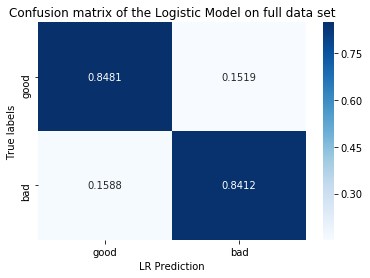

In [93]:
cm = confusion_matrix(Y_test,Y_predict_LR_full)
cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
#Visualization of the Confusion matrix
ax=plt.subplot(title='Confusion matrix of the Logistic Model on full data set');
sns.heatmap(cm,annot=True, fmt='.4f', cmap='Blues', xticklabels=['good', 'bad'], yticklabels=['good', 'bad'])
ax.set_xlabel('LR Prediction');
ax.set_ylabel('True labels');

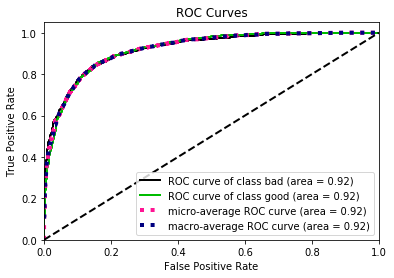

In [94]:
Y_predict_proba_LR_full = model_LR_full.predict_proba(X_test_tfidf_full)
skplt.metrics.plot_roc_curve(Y_test, Y_predict_proba_LR_full)
plt.show()

#### VI.1.2 PCA data set


In [95]:
print(classification_report(Y_test, Y_predict_LR_pca))

              precision    recall  f1-score   support

         bad       0.83      0.84      0.84      1501
        good       0.84      0.83      0.83      1499

    accuracy                           0.84      3000
   macro avg       0.84      0.84      0.84      3000
weighted avg       0.84      0.84      0.84      3000



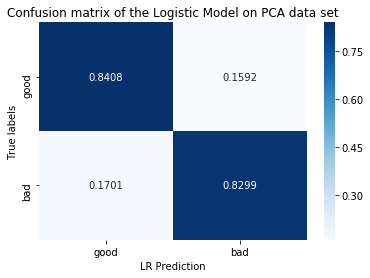

In [96]:
cm = confusion_matrix(Y_test,Y_predict_LR_pca)
cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
#Visualization of the Confusion matrix
ax=plt.subplot(title='Confusion matrix of the Logistic Model on PCA data set');
sns.heatmap(cm,annot=True, fmt='.4f', cmap='Blues', xticklabels=['good', 'bad'], yticklabels=['good', 'bad'])
ax.set_xlabel('LR Prediction');
ax.set_ylabel('True labels');

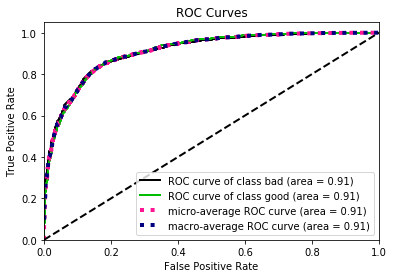

In [97]:
Y_predict_proba_LR_pca = model_LR_pca.predict_proba(X_test_tfidf_pca)
skplt.metrics.plot_roc_curve(Y_test, Y_predict_proba_LR_pca)
plt.show()

#### VI.2 Resultat de SVM
#### VI.2.1 Tout le dictionnaire


In [98]:
print(classification_report(Y_test, Y_predict_SVM_full))

              precision    recall  f1-score   support

         bad       0.84      0.84      0.84      1501
        good       0.84      0.84      0.84      1499

    accuracy                           0.84      3000
   macro avg       0.84      0.84      0.84      3000
weighted avg       0.84      0.84      0.84      3000



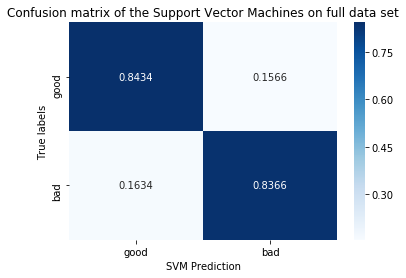

In [99]:
cm = confusion_matrix(Y_test,Y_predict_SVM_full)
cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
#Visualization of the Confusion matrix
ax=plt.subplot(title='Confusion matrix of the Support Vector Machines on full data set');
sns.heatmap(cm,annot=True, fmt='.4f', cmap='Blues', xticklabels=['good', 'bad'], yticklabels=['good', 'bad'])
ax.set_xlabel('SVM Prediction');
ax.set_ylabel('True labels');

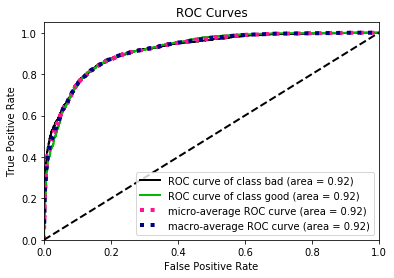

In [100]:
Y_predict_proba_SVM_full = model_SVM_full.predict_proba(X_test_tfidf_full)
skplt.metrics.plot_roc_curve(Y_test, Y_predict_proba_SVM_full)
plt.show()

#### VI.2.2  PCA data set

In [101]:
print(classification_report(Y_test, Y_predict_SVM_pca))

              precision    recall  f1-score   support

         bad       0.83      0.83      0.83      1501
        good       0.83      0.83      0.83      1499

    accuracy                           0.83      3000
   macro avg       0.83      0.83      0.83      3000
weighted avg       0.83      0.83      0.83      3000



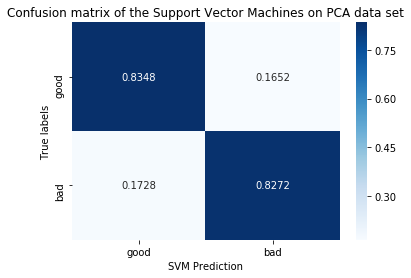

In [102]:
cm = confusion_matrix(Y_test,Y_predict_SVM_pca)
cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
#Visualization of the Confusion matrix
ax=plt.subplot(title='Confusion matrix of the Support Vector Machines on PCA data set');
sns.heatmap(cm,annot=True, fmt='.4f', cmap='Blues', xticklabels=['good', 'bad'], yticklabels=['good', 'bad'])
ax.set_xlabel('SVM Prediction');
ax.set_ylabel('True labels');

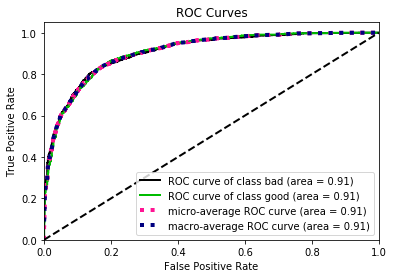

In [103]:
Y_predict_proba_SVM_pca = model_SVM_pca.predict_proba(X_test_tfidf_pca)
skplt.metrics.plot_roc_curve(Y_test, Y_predict_proba_SVM_pca)
plt.show()

## VII. Conclusion
Apres avoir choisi de ne conserver que deux modèles qui avaient l'accuracy la plus élevé, nous venons d'effectuer deux critères de comparaison afin de définir le model le plus performant et prenant en compte bien évidemment le temps de calcul nous permettant de l'appliquer sur toute la base de donnée.à <br>
Au vue des informations que nous apportent l'accuracy, la courbe ROC, et la matrice de confusion, nous choisissons pour la suite d'effectuer la prédiction du avec le modèle de **regression logistique**.

## VIII. Les codes pour modéliser tout le jeu d'apprentisage

In [104]:
### Delete all variables 
del X_train_tfidf_full, X_train_tfidf_pca, X_train_tfidf_lda, X_train_tfidf_rp, X_train_tfidf_umap
del X_test_tfidf_full, X_test_tfidf_pca, X_test_tfidf_lda, X_test_tfidf_rp, X_test_tfidf_umap
del Y_train, Y_test
gc.collect()

23743

In [ ]:
### Reimport full train set
df_train = pd.read_csv('train.txt', sep="\t",header =None)
df_train = pd.DataFrame(df_train[0].apply(lambda x: x.split(None, 1)).tolist(), columns=['label', 'text'])
### Rename label
df_train['label_new'] = 'good'
df_train['label_new'][df_train['label']=='__label__1']='bad'
df_train.drop('label',axis = 1,inplace=True)

In [ ]:
### SIA on all train set
train_sentiment = pd.DataFrame.from_records(df_train['text'].apply(lambda x: sia.polarity_scores(x)))
train_sentiment['Y_train'] = df_train['label_new']
train_sentiment['len'] = df_train['text'].apply(len)
train_sentiment['len'] = Normalizer().fit_transform(np.array(train_sentiment['len']).reshape(1,-1)).reshape(-1,1)

In [ ]:
### Divide train test in 4 parties to avoid the memory error
df_train_tokens_p1 =  parallelize_dataframe(df_train['text'][0:1000000])
df_train_tokens_p2 =  parallelize_dataframe(df_train['text'][1000000:2000000])
df_train_tokens_p3 =  parallelize_dataframe(df_train['text'][2000000:3000000])
df_train_tokens_p4 =  parallelize_dataframe(df_train['text'][3000000:])

In [ ]:
### Delete the full train set
del df_train
gc.collect()

In [ ]:
### Join all sub train sets to one
df_train_tokens = pd.concat([df_train_tokens_p1, df_train_tokens_p2, df_train_tokens_p3, df_train_tokens_p4], axis = 0)
### Clear memory
del df_train_tokens_p1, df_train_tokens_p2, df_train_tokens_p3, df_train_tokens_p4
gc.collect()

In [ ]:
### Create a dictionary on train test
df_train_dict = gensim.corpora.Dictionary(df_train_tokens)
df_train_dict.filter_extremes(keep_n=10000)

In [ ]:
### Divide train test in 4 again to tokenize
df_train_tokens_p1 = df_train_tokens[0:900000]
df_train_tokens_p2 = df_train_tokens[900000:1800000]
df_train_tokens_p3 = df_train_tokens[1800000:2700000]
df_train_tokens_p4 = df_train_tokens[2700000:]
del df_train_tokens
gc.collect()

In [ ]:
X_train_corpus  = [df_train_dict.doc2bow(doc) for doc in df_train_tokens_p1]
X_train_tfidf = gensim.models.TfidfModel(X_train_corpus, df_train_dict)

### transform data to spare matrix in order to reduce memory
X_train_tfidf_full_p1 = gensim.matutils.corpus2csc(X_train_tfidf[X_train_corpus], num_terms=len(df_train_dict)).T
del df_train_tokens_p1
gc.collect()

In [ ]:
X_train_corpus  = [df_train_dict.doc2bow(doc) for doc in df_train_tokens_p2]
X_train_tfidf = gensim.models.TfidfModel(X_train_corpus, df_train_dict)

### transform data to spare matrix in order to reduce memory
X_train_tfidf_full_p2 = gensim.matutils.corpus2csc(X_train_tfidf[X_train_corpus], num_terms=len(df_train_dict)).T
del df_train_tokens_p2
gc.collect()

In [ ]:
X_train_corpus  = [df_train_dict.doc2bow(doc) for doc in df_train_tokens_p3]
X_train_tfidf = gensim.models.TfidfModel(X_train_corpus, df_train_dict)

### transform data to spare matrix in order to reduce memory
X_train_tfidf_full_p3 = gensim.matutils.corpus2csc(X_train_tfidf[X_train_corpus], num_terms=len(df_train_dict)).T
del df_train_tokens_p3
gc.collect()

In [ ]:
X_train_corpus  = [df_train_dict.doc2bow(doc) for doc in df_train_tokens_p4]
X_train_tfidf = gensim.models.TfidfModel(X_train_corpus, df_train_dict)

### transform data to spare matrix in order to reduce memory
X_train_tfidf_full_p4 = gensim.matutils.corpus2csc(X_train_tfidf[X_train_corpus], num_terms=len(df_train_dict)).T
del df_train_tokens_p4
gc.collect()

In [ ]:
del df_train, df_train_tokens
gc.collect()

In [ ]:
### Join all sub tfidf matrices
X_train_tfidf_full = sparse.vstack([X_train_tfidf_full_p1,X_train_tfidf_full_p2,X_train_tfidf_full_p3,X_train_tfidf_full_p4])

In [ ]:
### add others statistic variables (SIA and length scaled)
X_train_tfidf_full = sparse.hstack([train_sentiment[['neg','neu','pos','compound','len']], X_train_tfidf_full])

In [ ]:
### assign Y_train
Y_train = train_sentiment['Y_train']

In [ ]:
### Import test set
df_test = pd.read_csv('test.txt', sep="\t",header =None)
df_test = pd.DataFrame(df_test[0].apply(lambda x: x.split(None, 1)).tolist(), columns=['label', 'text'])
df_test['label_new'] = 'good'
df_test['label_new'][df_test['label']=='__label__1']='bad'
df_test.drop('label',axis = 1,inplace=True)

In [ ]:
### SIA on test set
test_sentiment = pd.DataFrame.from_records(df_test['text'].apply(lambda x: sia.polarity_scores(x)))
test_sentiment['Y_test'] = df_test['label_new']
test_sentiment['len'] = df_test['text'].apply(len)
test_sentiment['len'] = Normalizer().fit_transform(np.array(test_sentiment['len']).reshape(1,-1)).reshape(-1,1)

In [ ]:
### tokenize test set
df_test_tokens =  parallelize_dataframe(df_test['text'])
del df_test
gc.collect()

In [ ]:
### transform test set to TFIDF matrix
X_test_corpus  = [df_train_dict.doc2bow(doc) for doc in df_test_tokens]
X_test_tfidf = gensim.models.TfidfModel(X_test_corpus, df_train_dict)

### transform data to spare matrix in order to reduce memory
X_test_tfidf_full = gensim.matutils.corpus2csc(X_test_tfidf[X_test_corpus], num_terms=len(df_train_dict)).T
del df_test_tokens_p1, X_test_tfidf, X_test_corpus
gc.collect()

In [ ]:
### Add others statistic
X_test_tfidf_full = sparse.hstack([test_sentiment[['neg','neu','pos','compound','len']], X_test_tfidf_full])

In [ ]:
### Train Logistic regression model on all train set
p = time.time()
model_LR = LogisticRegression(random_state=0, solver='newton-cg', multi_class='multinomial')
model_LR.fit(X_train_tfidf_full,Y_train)
time_LR_full = time.time()-p

In [ ]:
### Predict Y_test
Y_predict_full = model_LR.predict(X_test_tfidf_full)

Y_test = test_sentiment['Y_test']

In [ ]:
accuracy_score(Y_test, Y_predict_full)

In [ ]:
print(classification_report(Y_test, Y_predict_full))

In [ ]:
cm = confusion_matrix(Y_test,Y_predict_full)
cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
#Visualization of the Confusion matrix
ax=plt.subplot(title='Confusion matrix of the Logistic Regression on all train set');
sns.heatmap(cm,annot=True, fmt='.4f', cmap='Blues', xticklabels=['good', 'bad'], yticklabels=['good', 'bad'])
ax.set_xlabel('LR Prediction');
ax.set_ylabel('True labels');